의사결정나무 (Iris 데이터 셋)

In [10]:
from sklearn.datasets import load_iris    
from sklearn.model_selection import train_test_split

# Iris 데이터 불러오기

iris=load_iris()

# Training Dataset , Testing Dataset 나누기

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=24)

In [3]:
from sklearn.tree import DecisionTreeClassifier   

# 의사결정나무 모델링

DT_MODEL= DecisionTreeClassifier(random_state=0) 
DT_MODEL.fit(X_train, y_train)

# 에측하기

prediction=DT_MODEL.predict(X_test)

In [4]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
CM=confusion_matrix(y_test, prediction)
CM_report=classification_report(y_test, prediction)
print('-'*15, 'Confusion Matrix','-'*15)
print(CM)

print('-'*15, 'Confusion Matrix2','-'*15)
import pandas as pd
CM_rename=pd.DataFrame(CM).rename(index={0:'실제값(0)',1:'실제값(1)',2:'실제값(2)'},columns={0:'예측값(0)',1:'예측값(1)',2:'예측값(2)'})
print(CM_rename)


--------------- Confusion Matrix ---------------
[[10  0  0]
 [ 0  2  2]
 [ 0  0 16]]
--------------- Confusion Matrix2 ---------------
        예측값(0)  예측값(1)  예측값(2)
실제값(0)      10       0       0
실제값(1)       0       2       2
실제값(2)       0       0      16


In [5]:
# 성능평가 

print('-'*20, '성능평가','-'*20)
print(CM_report)

-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.50      0.67         4
           2       0.89      1.00      0.94        16

    accuracy                           0.93        30
   macro avg       0.96      0.83      0.87        30
weighted avg       0.94      0.93      0.92        30



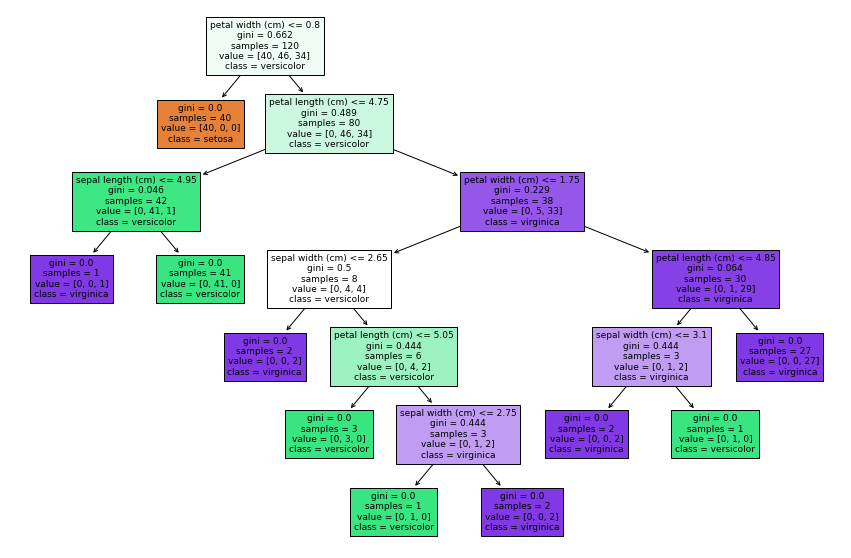

In [6]:
# 의사결정나무 모델 가시화

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(DT_MODEL,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=9)
plt.show()

--------------- Confusion Matrix ---------------
[[10  0  0]
 [ 0  3  1]
 [ 0  0 16]]
-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



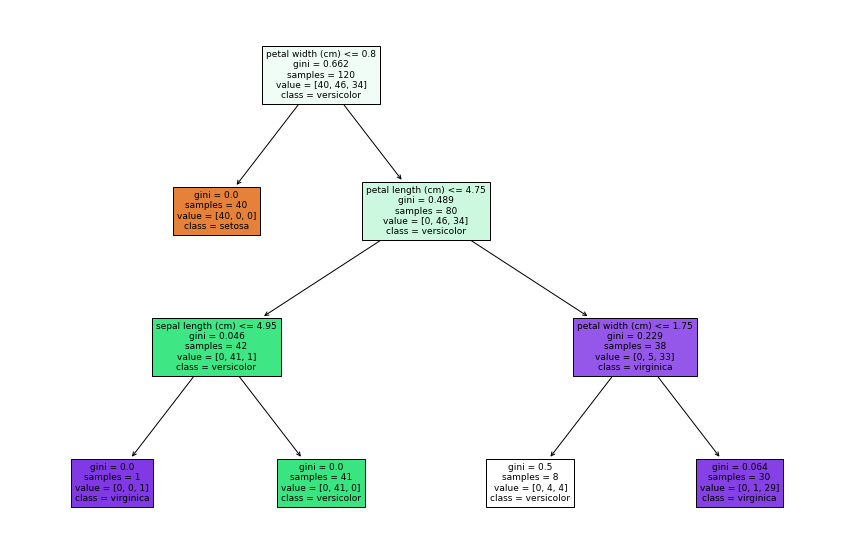

In [7]:
# 가지치기1 - Depth 설정

DT_MODEL_DEP3= DecisionTreeClassifier(max_depth=3, random_state=0) 
DT_MODEL_DEP3.fit(X_train, y_train)

prediction_DEP3=DT_MODEL_DEP3.predict(X_test)

CM_DEP3=confusion_matrix(y_test, prediction_DEP3)
CM_report_DEP3=classification_report(y_test, prediction_DEP3)

print('-'*15, 'Confusion Matrix','-'*15)
print(CM_DEP3)
print('-'*20, '성능평가','-'*20)
print(CM_report_DEP3)

plt.figure(figsize=(15,10))
plot_tree(DT_MODEL_DEP3,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=9)
plt.show()

--------------- Confusion Matrix ---------------
[[10  0  0]
 [ 0  3  1]
 [ 0  0 16]]
-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



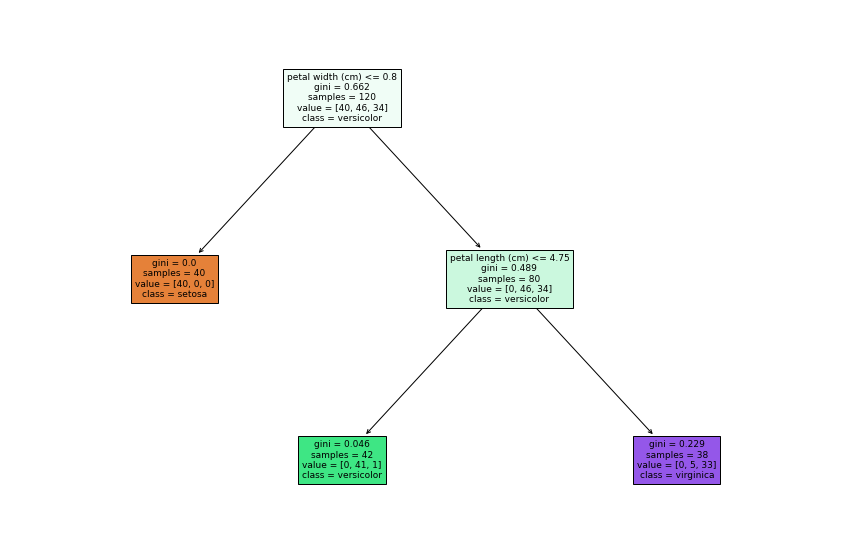

In [8]:
# 가지치기2 - 최소 샘플 개수 설정

DT_MODEL_MINSAM= DecisionTreeClassifier(min_samples_split=45, random_state=0) 
DT_MODEL_MINSAM.fit(X_train, y_train)

prediction_MINSAM=DT_MODEL_MINSAM.predict(X_test)

CM_MINSAM=confusion_matrix(y_test, prediction_MINSAM)
CM_report_MINSAM=classification_report(y_test, prediction_MINSAM)

print('-'*15, 'Confusion Matrix','-'*15)
print(CM_MINSAM)
print('-'*20, '성능평가','-'*20)
print(CM_report_MINSAM)

plt.figure(figsize=(15,10))
plot_tree(DT_MODEL_MINSAM,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=9)
plt.show()

sepal length (cm) : 0.027
sepal width (cm) : 0.000
petal length (cm) : 0.387
petal width (cm) : 0.586


<AxesSubplot:>

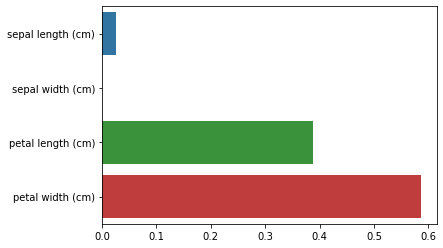

In [9]:
# 변수 중요도

for name, value in zip(iris.feature_names , DT_MODEL_DEP3.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# 변수 중요도 가시화    

import seaborn as sns
sns.barplot(x=DT_MODEL_DEP3.feature_importances_ , y=iris.feature_names)